<a href="https://colab.research.google.com/github/KevinGastelum/MyMachineLearning/blob/main/BreastCancerDetectorV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Detector using Machine Learning V2**

**This model scores upwards of 98% Accuracy**

In [78]:
# Imported Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

# Sklearn Libraries
from sklearn import datasets
from sklearn.utils import resample
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import joblib
#from sklearn.externals import joblib
from sklearn.feature_selection import RFE, RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import warnings
warnings.simplefilter('ignore')

## **Notes on Data**
Attribute Information:

1) ID Number    
2) Diagnosis (M = malignent, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of grey-scale values)
* perimeter
* area
* smoothness (local variation in radius length)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" -1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 feratures. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recorded with four significant digits. <br>
Class distribution: 357 benign, 212 malignant

In [79]:
# You can download data from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# Or https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
data = pd.read_csv('data.csv')

In [80]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


There are 3 things to take note of:
* id column is not useful for classification
* Diagnosis is our target/label
* The remaining 30 columns are numerical so we dont have any categorical variables

In [81]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [82]:
y = data.diagnosis #M or B
X = data.drop(['id', 'diagnosis'], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
color = sns.color_palette(['#CE4257','#f5abdf']) # #ed32b5

Number of Benign:  357
Number of Malignant:  212


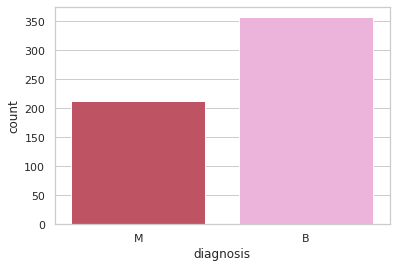

In [84]:
ax = sns.countplot(y, label='Count', palette=color) # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [85]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The features can be grouped together based on the Mean/StandardError/Worst that they correspond to. So it is important to understand here that the standard error and worst are just results of feature engineering on the primary 10 feature means

In [86]:
features_mean = list(X.columns[1:10])
features_se = list(data.columns[10:20])
features_worst = list(data.columns[20:30])

It is very difficult to draw any meaningful information from the above table and so we decide to plot it out

### Violin Plots

These plots allow us to draw any meaningful data from the table above

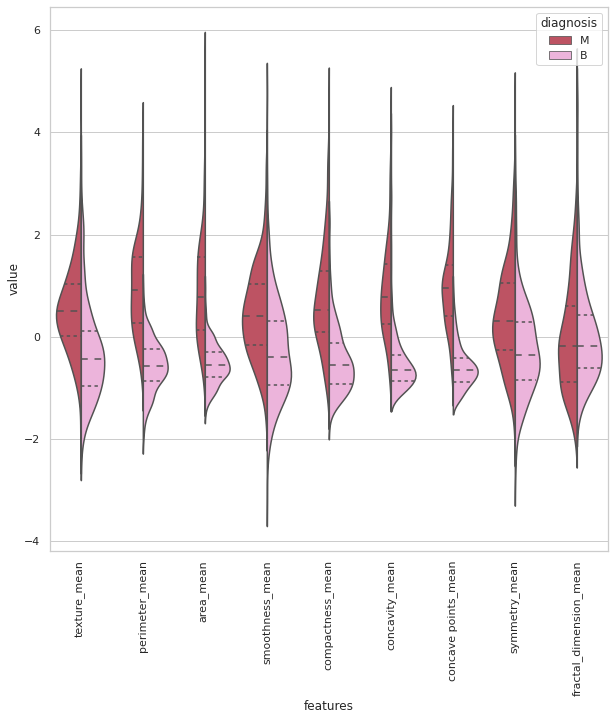

In [87]:
# First 10 features
data_diagnosis = y
data = X
data_2 = (data - data.mean()) / (data.std()) # Standard Deviation
data = pd.concat([y,data_2[features_mean]], axis=1)
data = pd.melt(data,id_vars='diagnosis',
               var_name='features',
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart', palette=color)
plt.xticks(rotation=90)
plt.show()

**Interpreting the Plot:** In texture_mean the median between Malignant and Benign look seperated so it can be good for classification. 
However, in fractal_dimension_mean the median between the Malignant and Benign does not look as seperate so it does not give good information for classification.

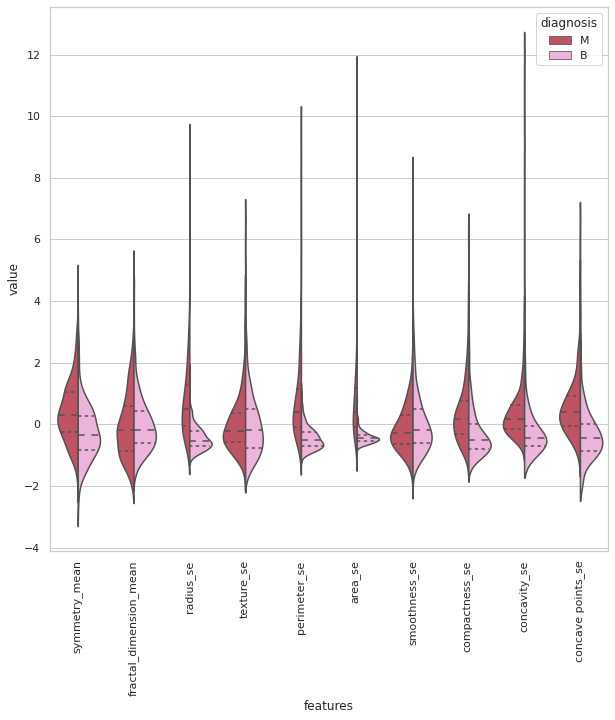

In [88]:
# Second 10 features
data = pd.concat([y, data_2[features_se]], axis=1)
data = pd.melt(data,id_vars='diagnosis',
               var_name='features',
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart', palette=color)
plt.xticks(rotation=90)
plt.show()

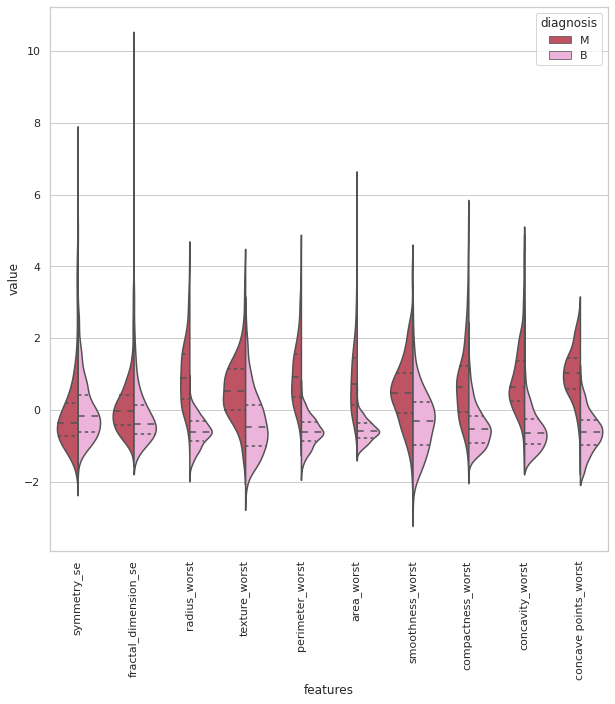

In [89]:
# Third 10 features
data = pd.concat([y, data_2[features_worst]], axis=1)
data = pd.melt(data,id_vars='diagnosis',
               var_name='features',
               value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart', palette=color)
plt.xticks(rotation=90)
plt.show()

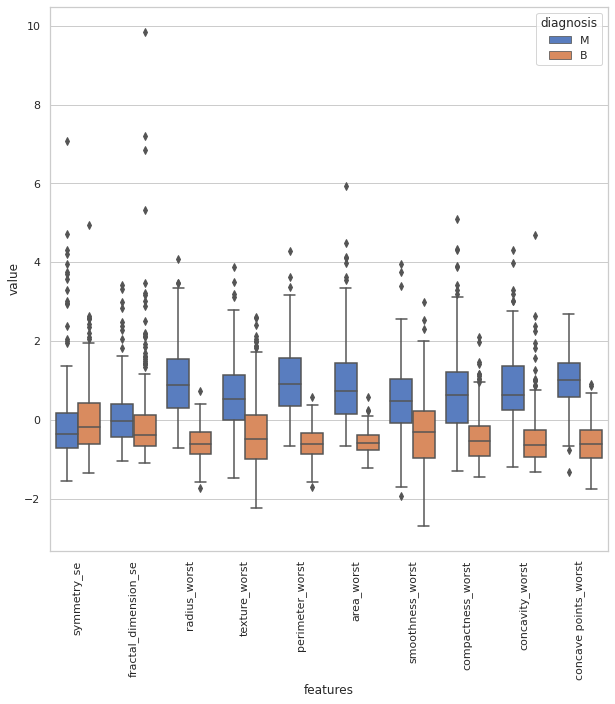

In [90]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

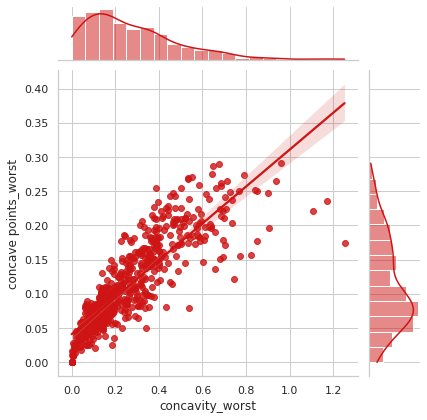

In [91]:
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="reg", color="#ce1414")
plt.show()

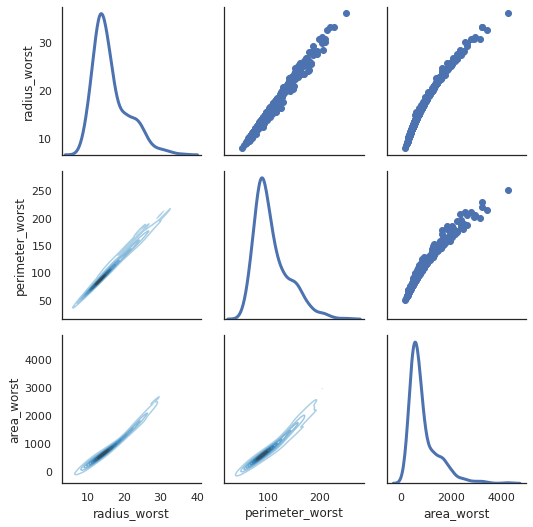

In [92]:
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

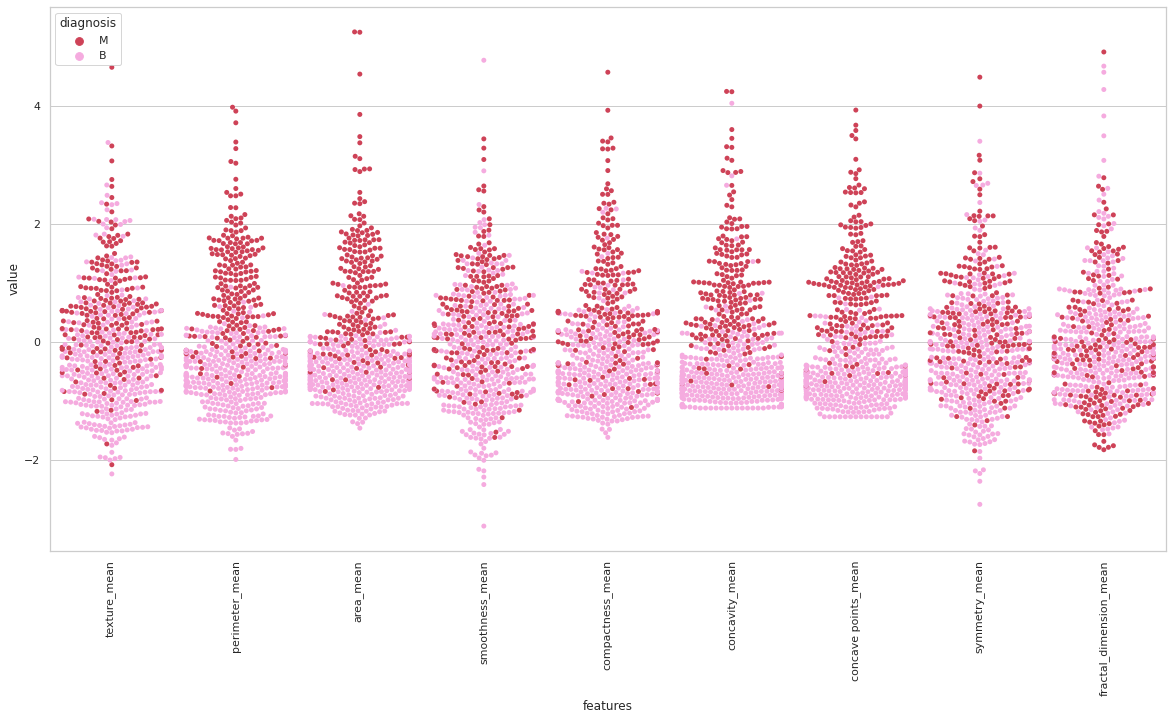

In [93]:
sns.set(style='whitegrid', palette='muted')
data_diagnosis = y
data = X
data_2 = (data - data.mean()) / (data.std()) # Standard Deviation
data = pd.concat([y, data_2[features_mean]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
                  var_name='features',
                  value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data, palette=color)

plt.xticks(rotation=90)
plt.show()

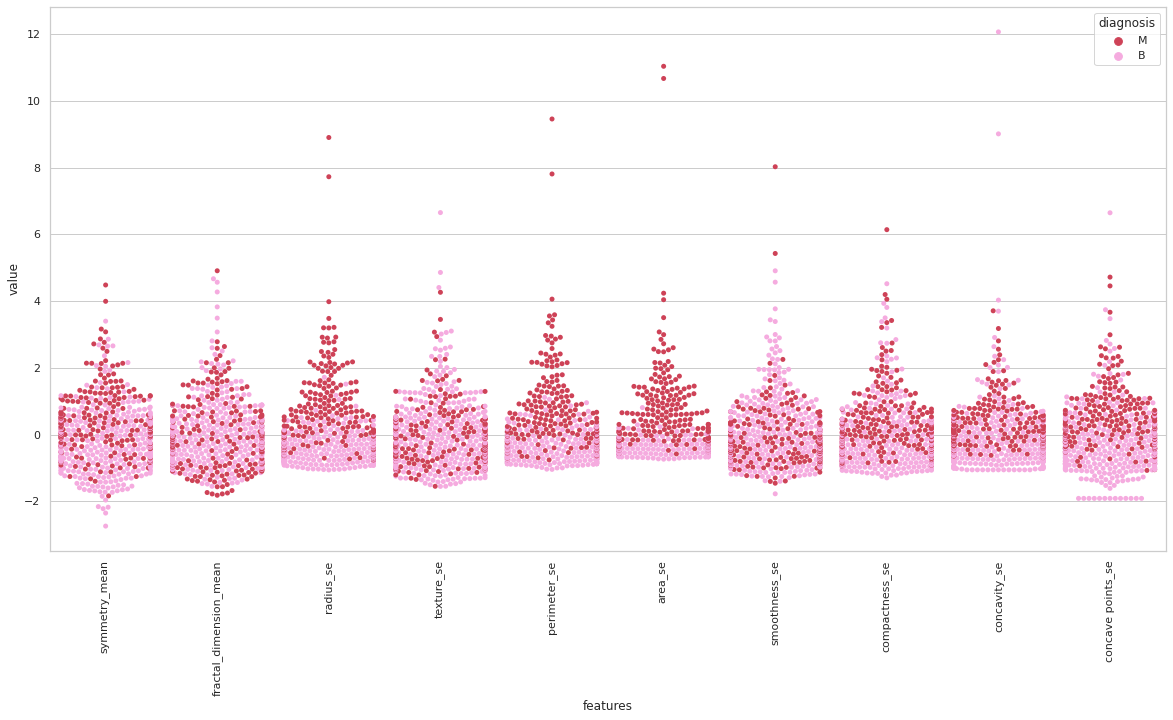

In [94]:
data = pd.concat([y, data_2[features_se]],axis=1)
data = pd.melt(data,id_vars='diagnosis',
               var_name='features',
               value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data, palette=color)

plt.xticks(rotation=90)
plt.show()

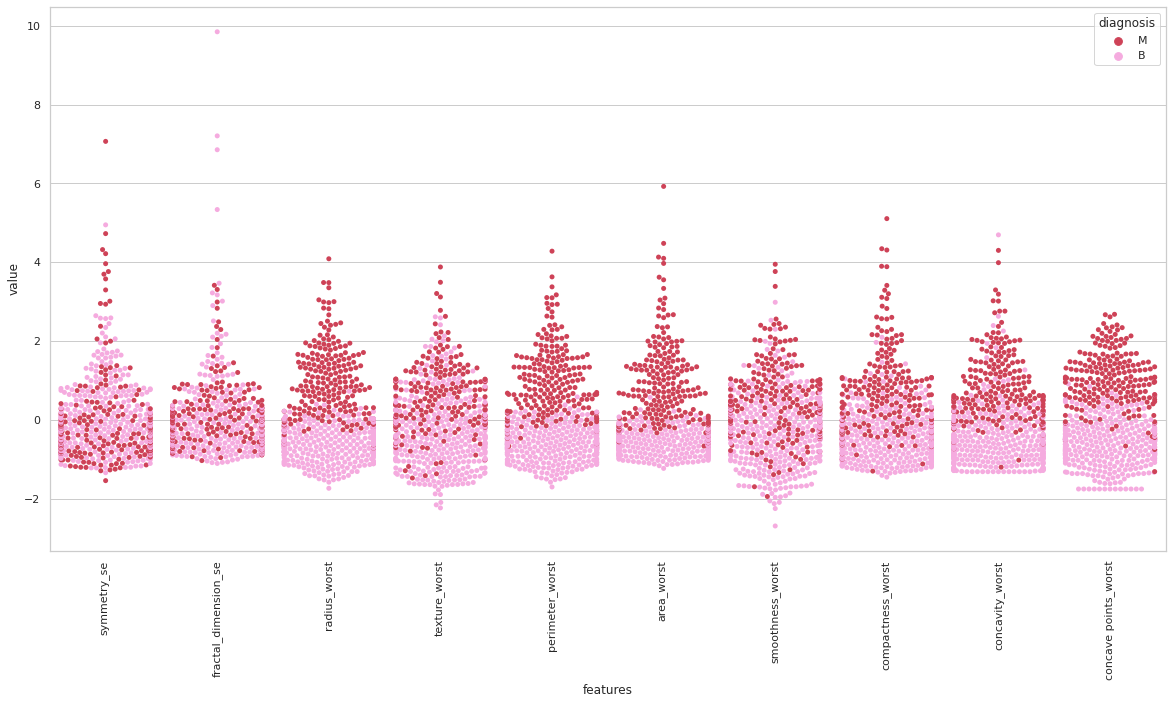

In [95]:
data = pd.concat([y, data_2[features_worst]], axis=1)
data = pd.melt(data, id_vars='diagnosis',
               var_name='features',
               value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data, palette=color)
plt.xticks(rotation=90)
plt.show()

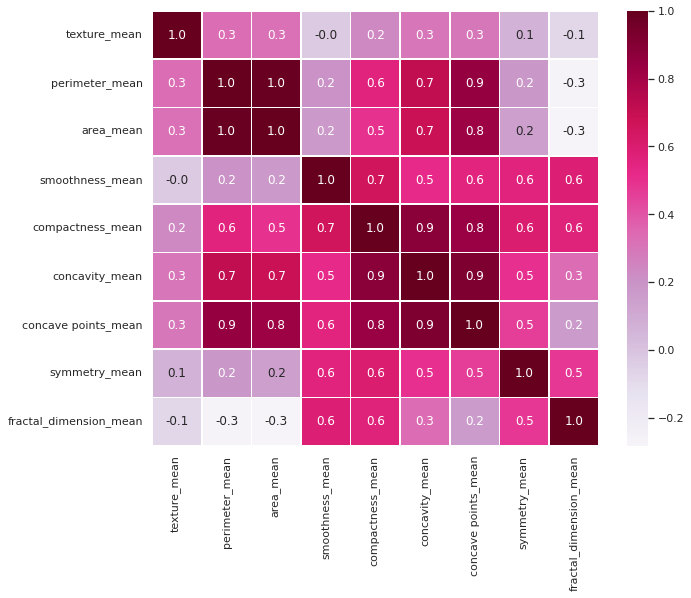

In [96]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X[features_mean].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='PuRd')
plt.show()

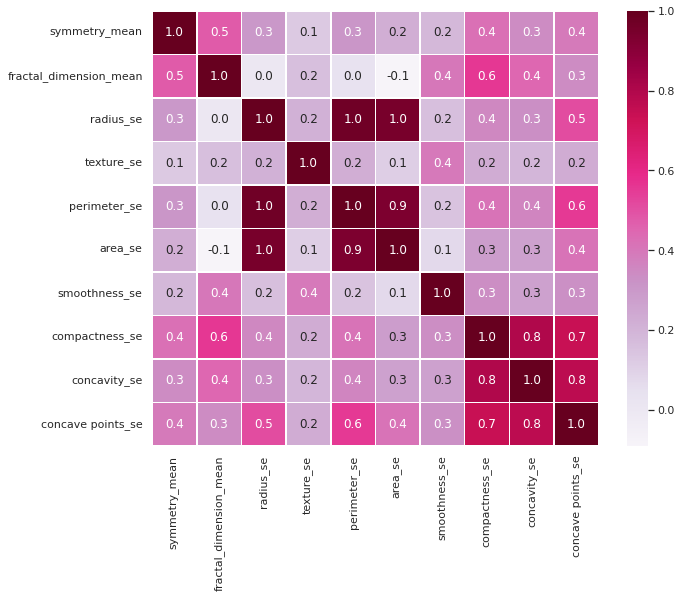

In [97]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X[features_se].corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax, cmap='PuRd')
plt.show()

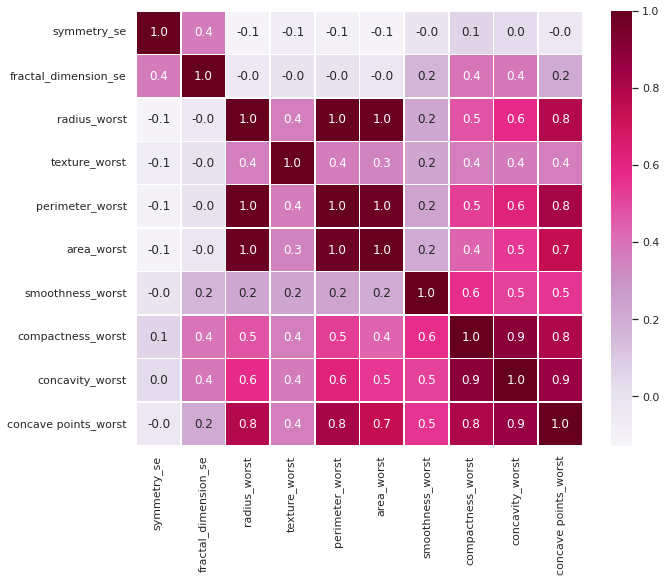

In [98]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X[features_worst].corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax, cmap='PuRd')
plt.show()

## Feature Selection

**Importance of Feature Selection**

1. Reduce Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise
2. Improve Accuracy: Less misleading data means modeling accuracy improves
3. Reduce Training Time: Less data means that algorithm train faster

**1) Feature Selection from correlation matrix**

As it can be seen in the Heatmap figure radius_mean, perimeter_mean and area_mean are strongly correlated with each other. So we elect to use only the **area_mean** after looking at the Violin plot and swarm plot of the corresponding features. This seems to delineate the two classes best.

* compactness_mean, concavity_mean, and concave points_mean, are also strongly correlated with each other. So we elect to use only **concavity_mean**
* radius_se, perimeter_se, and area_se are also strongly correlated. So we elect to use only the **area_se**
* radius_worst, perimeter_worst, and area_worst are also strongly correlated. So we elect to use only **area_worst**
* compactness_worst, concavity_worst and concave points_worst are also strongly correlated. So we elect to use only **concavity_worst**
* compactness_se, concavity_se, and concave points_se are also strongly correlated. So we elect to use only **concavity_se**
* texture_mean and texture_worst are also strongly correlated. So we elect to use  only **texture_mean**
* area_worst and area_mean are also strongly correlated. So we elect to use **area_mean**

One can clearly see that thus far the features we have dropped are linked by mathematical relations, ie. Radius, Perimeter, and Area all have a clear link between them and should be correlated to each other.



In [99]:
drop_list = ['radius_mean','perimeter_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
clean_data = X.drop(drop_list,axis=1) # Do not modify x we need this for later
clean_data

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


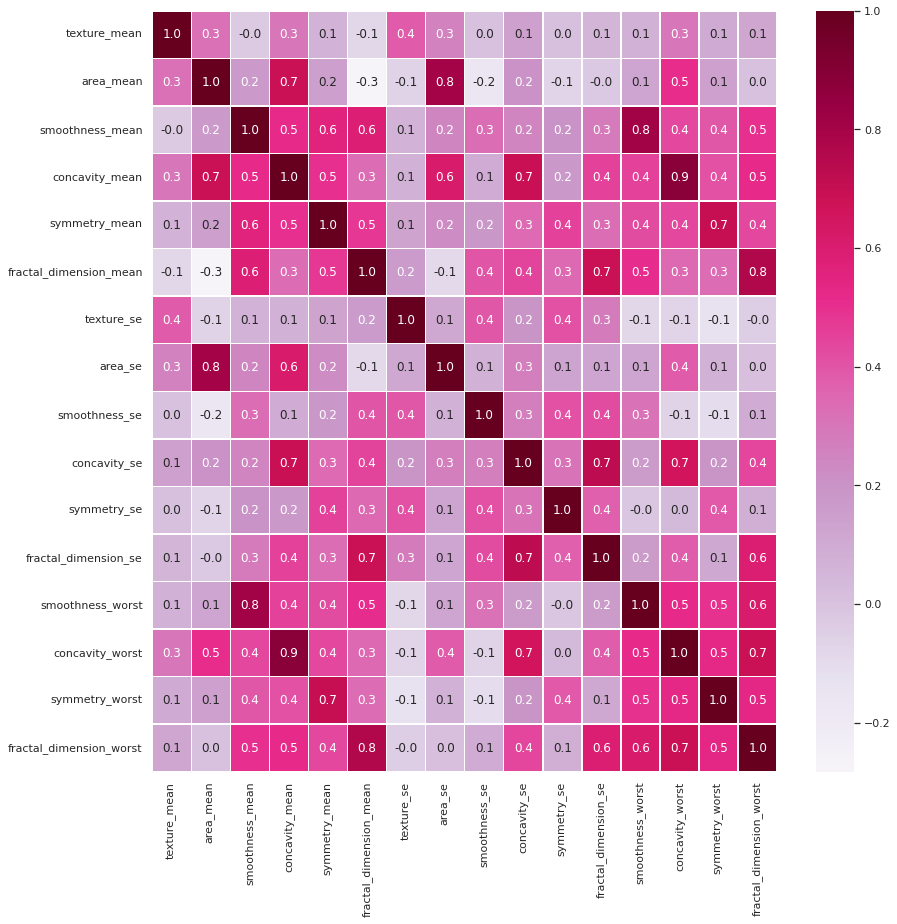

In [100]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(clean_data.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax, cmap='PuRd')
plt.show()

After removing correlated columns we can notice that only the high degree of correlation remains between those columns which are obviously linked by feature engineering

In [101]:
# Split the data 70/30 Train-Test
X_corr_train, X_corr_test, y_train, y_test = train_test_split(clean_data, y, test_size=0.3, random_state=42)

**2) Univariate feature selection**

We use the SelectKBest function and chi2 as the evaluation metric (univariate statistical test). It can be seen as a preprocessing step to an estimator. We then select the 5 best features to be used from the dataset for our analysis.

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [103]:
# Find the top 5 scored features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
X_kbest_train = select_feature.transform(X_train)
X_kbest_test = select_feature.transform(X_test)

print(f'Score list: {select_feature.scores_}')

Score list: [1.77946492e+02 6.06916433e+01 1.34061092e+03 3.66899557e+04
 1.00015175e-01 3.41839493e+00 1.30547650e+01 7.09766457e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.72696840e+02 6.12741067e+03 1.32470372e-03 3.74071521e-01
 6.92896719e-01 2.01587194e-01 1.39557806e-03 2.65927071e-03
 3.25782599e+02 1.16958562e+02 2.40512835e+03 7.50217341e+04
 2.63226314e-01 1.19077581e+01 2.58858117e+01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]


So now we get the top 5 features to sort by and we can check which those are below

In [104]:
df = pd.DataFrame([select_feature.scores_, X_train.columns]).transpose()
df.columns = ['Score', 'Feature']
df.sort_values(by='Score',ascending=False).head()

,Score,Feature
23,75021.734079,area_worst
3,36689.95566,area_mean
13,6127.41067,area_se
22,2405.128351,perimeter_worst
2,1340.610924,perimeter_mean


**3) Principal Component Analysis**

PCA is a method to project data in a higher dimensional space into a lower dimensional space by maximizing the variance of each dimension.

In [105]:
# Split the data into 70/30 Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train_N = (X_train-X_train.mean())/(X_train.std())
X_test_N = (X_test-X_test.mean())/(X_test.std())
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

PCA()

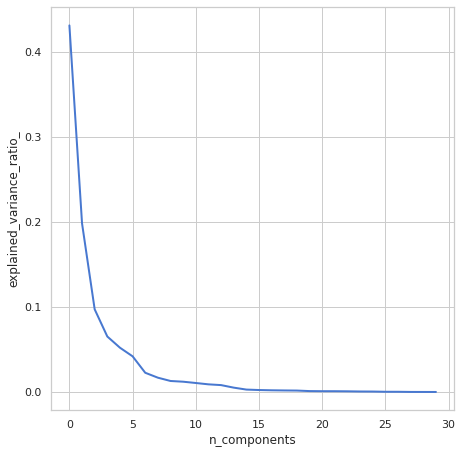

In [106]:
plt.figure(1, figsize=(8,8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

We can use 5 components as these 5 components explain about 85% of the variance in the data. 

In [107]:
pca = PCA(n_components=5)
pca.fit(X_train_N)
pca.explained_variance_ratio_

array([0.4316748 , 0.19845652, 0.09733159, 0.06531574, 0.05212151])

In [108]:
X_pca_train = pca.transform(X_train_N)
X_pca_test = pca.transform(X_test_N)

**Defining Helper Function**

M = 0 <br>
B = 1

In [109]:
def get_results(y_test, y_pred):
  acc = balanced_accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
  rec = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
  f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

  model_results = pd.DataFrame([[acc,prec,rec,f1]],
                               columns = ['Balanced Accuracy', 'Weighted Precision',
                                          'Weighted Recall', 'Weighted F1 Score'])
  return model_results

def make_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  ax = sns.heatmap(cm, annot=True, square=True, fmt='d', cmap='RdPu')
  plt.title("Confusion Matrix", fontsize=15)
  plt.xlabel('predicted')
  plt.ylabel('target')
  plt.show()

In [110]:
store_of_results = []

**No Feature Selection Split**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

We shall thus be testing out the various feature selection methods:
* X_corr_train, X_corr_test
* X_kbest_train, X_kbest_test
* X_pca_train, X_pca_test
* Recursive Feature Elimination for each Classifier (if possible)
* No feature selection

In [112]:
train_datasets = [X_train, X_corr_train, X_kbest_train, X_pca_train]
test_datasets = [X_test, X_corr_test, X_kbest_test, X_pca_test]
dataset_names = ['Standard', 'Correlation Selection', 'KBest', 'PCA']

## Predictive model: Logistic Regression

Logistic Regression is another technique borrowed by Machine Learning from the field of Statistics. It is the go to method for binary classification problems.


In [113]:
model = LogisticRegression(solver = 'liblinear',
                           random_state=42, class_weight = 'balanced')

In [114]:
for i, m in enumerate(dataset_names):
  model.fit(train_datasets[i], y_train)
  y_pred = model.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'Logistic Regression'
  df['dataset'] = m
  store_of_results.append(df)

We try recursive Feature Elimination and see what kind of results we obtain

In [115]:
rfecv = RFECV(estimator=LogisticRegression(solver = "liblinear", random_state=42),
             step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 27


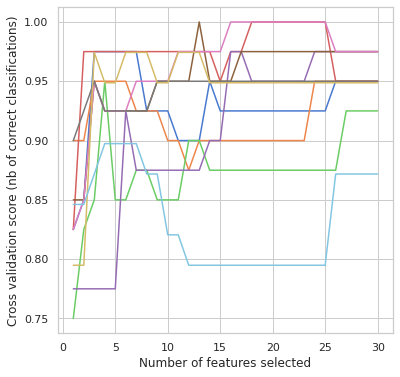

In [116]:
# Plot number of features VS Cross validation scores
plt.figure(figsize=(6,6))
plt.xlabel("Number of features selected", fontsize=12)
plt.ylabel("Cross validation score (nb of correct classifications)", fontsize=12)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

We see that less than 5 features we already have 97% accuracy and beyond that is just extreme overfitting. Consequently we elect not to include the 26 feature result of RFECV

## **Predictive Model: KNN**

KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) — calculating the distance between points on a graph

In [119]:
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn11 = KNeighborsClassifier(n_neighbors = 11)
knn17 = KNeighborsClassifier(n_neighbors = 17)
knn21 = KNeighborsClassifier(n_neighbors = 21)
list_of_model = [knn5, knn7, knn9, knn11, knn17, knn21]

knn_results = []
k = [5,7,9,11,17,21]
for i, model in enumerate(list_of_model):
  model.fit(train_datasets[1], y_train)
  y_pred = model.predict(test_datasets[1])
  df = get_results(y_test, y_pred)
  df['k'] = k[i]
  knn_results.append(df)
knn_res = pd.concat(knn_results)

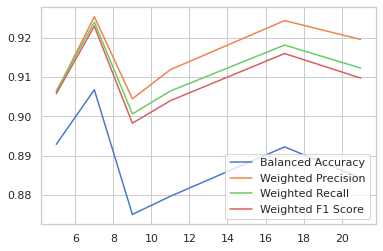

In [120]:
for i in range(4):
  plt.plot(knn_res['k'],knn_res.iloc[:,i])
plt.legend(knn_res.columns[:-1])
plt.show()

In [121]:
model = KNeighborsClassifier(n_neighbors = 7)

In [123]:
for i, m in enumerate(dataset_names):
  model.fit(train_datasets[i], y_train)
  y_pred = model.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'KNN-7'
  df['dataset'] = m
  store_of_results.append(df)

We cannot use RFECV here as KNN has a different approach to classifications and doesnt make explicit the importance of each feature

## **Predictive model: AdaBoost**

AdaBoost is an ensemble learning method (also known as "meta learning") which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones

In [124]:
clf = AdaBoostClassifier(random_state=42)

In [125]:
for i, m in enumerate(dataset_names):
  clf.fit(train_datasets[i], y_train)
  y_pred = clf.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df["model"] = "Adaboost"
  df["dataset"] = m
  store_of_results.append(df)

## **Predictive model: SVM**

A support vector machine (SVM) is a discriminative classifier formally defined by a seperating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts where in each lay in either side

In [128]:
svc_rbf = SVC(kernel='rbf', gamma='scale', class_weight='balanced')

In [129]:
for i,m in enumerate(dataset_names):
  svc_rbf.fit(train_datasets[i], y_train)
  y_pred = svc_rbf.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'SVM'
  df['dataset'] = m
  store_of_results.append(df)

SVM doesnt have REFCV as well

## **Predictive model: Naive Bayes**

Classification technique based on the Bayes Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature 

In [130]:
gnb = GaussianNB()

In [131]:
for i, m in enumerate(dataset_names):
  gnb.fit(train_datasets[i], y_train)
  y_pred = gnb.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'Naive Bayes'
  df['dataset'] = m
  store_of_results.append(df)

We cannot use RFECV here as NB has a different approach to classification and doesnt make explicit the importance of each feature

## **Predictive model: Random Forest**

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction.

In [132]:
rf_model = RandomForestClassifier()

In [133]:
for i,m in enumerate(dataset_names):
  rf_model.fit(train_datasets[i], y_train)
  y_pred = rf_model.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'Random Forest'
  df['dataset'] = m
  store_of_results.append(df)

In [134]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features:', rfecv.n_features_)

Optimal number of features: 15


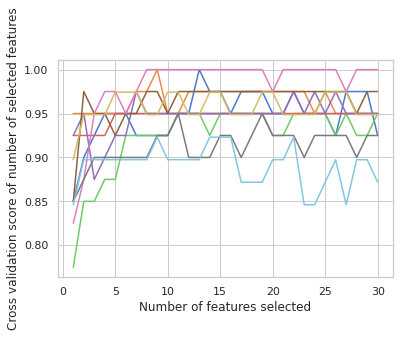

In [136]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## **Predictive model: Decision Tree**

Decision tree models are created using 2 steps: Induction and Pruning. Induction is where we actually build the tree i.e set all of the hierarchical decision boundaries based on our data. Because of the nature of training decision trees they can be prone to major overfitting. Pruning is the process of removing the unnecessary structure from a decision tree, effectively reducing the complexity to combat overfitting with the added bonus of making it even easier to interpet.

In [137]:
model = DecisionTreeClassifier()

In [138]:
for i,m in enumerate(dataset_names):
  model.fit(train_datasets[i], y_train)
  y_pred = model.predict(test_datasets[i])
  df = get_results(y_test, y_pred)
  df['model'] = 'Decision Trees'
  df['dataset'] = m
  store_of_results.append(df)

In [140]:
rfecv = RFECV(estimator=DecisionTreeClassifier(),
              step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 3


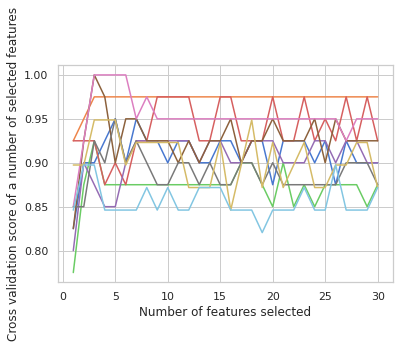

In [142]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of a number of selected features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## **Analysis of Results**

In [144]:
df = pd.concat(store_of_results)
df.reset_index(inplace=True, drop=True)
df.iloc[df.groupby(by=['model']).idxmax()["Weighted F1 Score"]]

,Balanced Accuracy,Weighted Precision,Weighted Recall,Weighted F1 Score,model,dataset
8,0.974868,0.976608,0.976608,0.976608,Adaboost,Standard
27,0.948413,0.948462,0.947368,0.947610,Decision Trees,PCA
4,0.958995,0.964954,0.964912,0.964790,KNN-7,Standard
3,0.987434,0.988304,0.988304,0.988304,Logistic Regression,PCA
18,0.939815,0.954755,0.953216,0.952679,Naive Bayes,KBest
21,0.971561,0.976735,0.976608,0.976527,Random Forest,Correlation Selection
15,0.974868,0.976608,0.976608,0.976608,SVM,PCA


From this we can see Logistic Regression is the best performing model across all the datasets. Logistic Regression on the dataset obtained after PCA obtains accuracy upwards to 98% and is our model and method of choice